<a href="https://colab.research.google.com/github/alangaurav/DAV15714/blob/master/Neural_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 7: Neural nets using sklearn

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix, f1_score, precision_score, mean_squared_log_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay

### MLP Classification

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



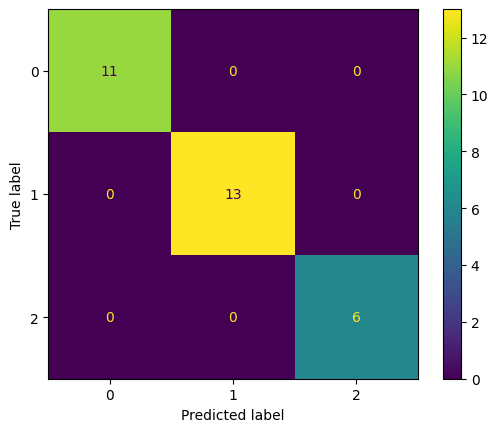

In [3]:
iris_data = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Seven/data/iris.txt')
X = iris_data.drop('species', axis=1)
y = iris_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing: Normalise the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Train model
model = MLPClassifier(hidden_layer_sizes=(5, 7, 9, 4), max_iter=2000)
model.fit(X_train_norm, y_train)

# Predict on test
y_preds = model.predict(X_test_norm)

# Evaluate the model
conf_mat = confusion_matrix(y_test, y_preds)
cmd = ConfusionMatrixDisplay(conf_mat)
print(classification_report(y_test, y_preds))
cmd.plot()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



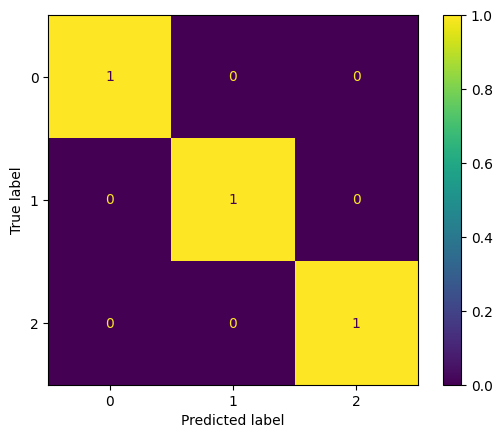

Model coefficients: [array([[-5.13824512e-03,  4.47788955e-01, -3.18181781e-01,
         5.50556409e-08, -3.25426649e-01,  5.07907950e-03,
        -4.98129078e-01,  5.72231799e-01,  7.95825395e-01,
         8.84947561e-03,  2.94924534e-02,  6.37910320e-02],
       [ 1.83237803e-01,  4.66962152e-01, -2.11374169e-01,
        -8.82492462e-02, -3.41996781e-01,  1.68650481e-01,
         3.59930965e-01,  4.69763666e-01,  6.16379465e-01,
         2.62143949e-01, -5.17371562e-09,  2.84027564e-01],
       [-2.22672700e-01,  4.30390686e-01, -6.52746572e-01,
         1.07663754e-01, -1.97676451e-01, -1.33132718e-01,
        -6.23769555e-01,  3.51696088e-01,  3.86753964e-01,
         2.13583421e-01, -1.31521326e-01,  6.07526174e-02],
       [ 4.12362725e-01,  1.85712926e-01,  6.97521771e-01,
         3.80224543e-03,  2.32467193e-01, -1.17894404e-01,
         4.96012927e-01, -3.36302110e-01,  1.90918541e-01,
         3.74840612e-01, -2.87303894e-02, -2.81045094e-01],
       [ 7.24679824e-02,  9.617

In [4]:
# Use the wine dataset
wine = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Seven/data/wine.txt', delimiter=',')
X = wine.drop('Wine', axis=1)
y = wine['Wine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalise the data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Train the model
model = MLPClassifier(hidden_layer_sizes=(12, 10, 8, 6) ,random_state=0, max_iter=500)
model.fit(X_train_norm, y_train)

# Predict on test
y_preds = model.predict(X_test_norm)

# Evaluate the model
conf_mat = confusion_matrix(y_test, y_preds, normalize='true')
cmd = ConfusionMatrixDisplay(conf_mat)
print(classification_report(y_test, y_preds))
cmd.plot()
plt.show()
print(f'Model coefficients: {model.coefs_}')
print(f'Model intercepts: {model.intercepts_}')

### MLP Regression

In [5]:
boston = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Seven/data/Boston.csv')
print(boston.columns)
X = boston.drop(['chas', 'age', 'ptratio', 'black', 'medv'], axis=1)
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalise the data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Train the model
model = MLPRegressor(hidden_layer_sizes=(5, 3), solver='lbfgs', max_iter=500)
model.fit(X_train_norm, y_train)

# Make predictions
y_preds = model.predict(X_test_norm)

# Evaluate the model
score = model.score(X_test_norm, y_test)
r2 = r2_score(y_test, y_preds)
msle = mean_squared_log_error(y_test, y_preds)

print(f'Model score: {score}')
print(f'Model r2: {r2}')
print(f'Model msle: {msle}')

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')
Model score: -0.001889807353118167
Model r2: -0.001889807353118167
Model msle: 0.14248647978373702


### Support vector models: LinearSVC

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.83      0.38      0.53        13
   virginica       0.38      0.83      0.53         6

    accuracy                           0.70        30
   macro avg       0.74      0.74      0.68        30
weighted avg       0.80      0.70      0.70        30



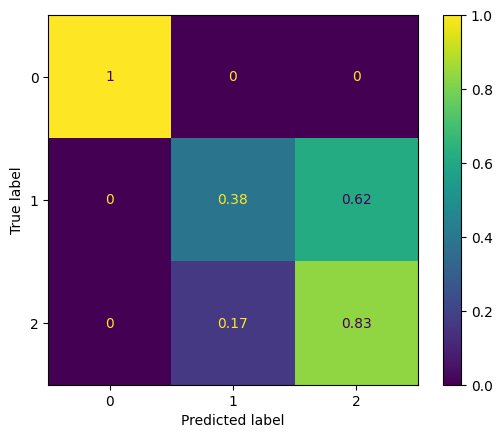

In [6]:
# Using the same iris data and train-test split with normalisation.
iris_data = pd.read_csv('/content/drive/MyDrive/DAV Lab/Week Seven/data/iris.txt')
X = iris_data.drop('species', axis=1)
y = iris_data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing: Normalise the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Usin LinearSVC model
model = LinearSVC(C=0.01, random_state=0)
model.fit(X_train_norm, y_train)

y_preds = model.predict(X_test_norm)

print(classification_report(y_test, y_preds))
cmat = confusion_matrix(y_test, y_preds, normalize='true')
cmd = ConfusionMatrixDisplay(cmat)
cmd.plot()
plt.show()